<a href="https://colab.research.google.com/github/Abhiroop17/Image-Classification-Using-CNN/blob/main/Cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setting up Directory**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

# **Download the dataset using Kaggle API**

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:07<00:00, 223MB/s]
100% 1.06G/1.06G [00:07<00:00, 146MB/s]


# **Unzip the Dataset**

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# **Importing necessary Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# **Split the Dataset**

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


# **Normalize**

In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

#**Create CNN model**

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

# **Compilation and Model Training**

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 101ms/step - loss: 1.7359 - accuracy: 0.5559 - val_loss: 0.6697 - val_accuracy: 0.5890
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6677 - accuracy: 0.6077 - val_loss: 0.6364 - val_accuracy: 0.6316
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5836 - accuracy: 0.6887 - val_loss: 0.5468 - val_accuracy: 0.7344
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4962 - accuracy: 0.7569 - val_loss: 0.4817 - val_accuracy: 0.7820
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4478 - accuracy: 0.7865 - val_loss: 0.5270 - val_accuracy: 0.7548
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3917 - accuracy: 0.8145 - val_loss: 0.8320 - val_accuracy: 0.6512
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3419 - accuracy: 0.8385 - val_loss: 0.4438 - val_ac

# **Accuracy Graph**

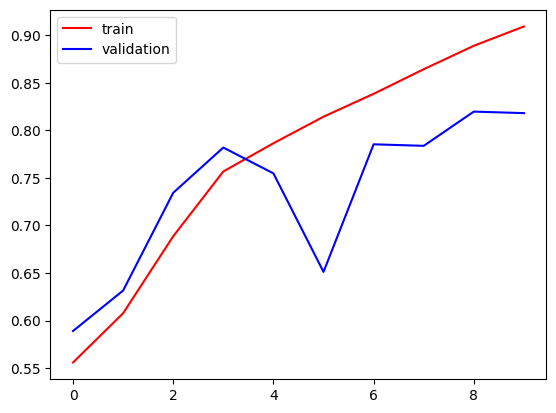

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

# **Loss Graph**

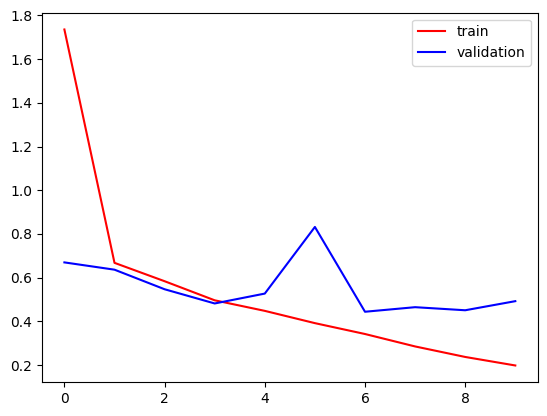

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# **Testing the Model**

In [ ]:
import cv2

# **Image Processing**

In [ ]:
test_img = cv2.imread('/content/dog.jpeg')

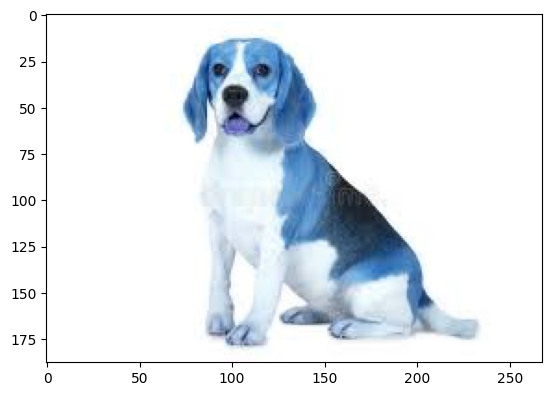

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(188, 268, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

# **Prediction**

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 402ms/step


array([[0.]], dtype=float32)

# **Image Processing**

In [ ]:
test_img = cv2.imread('/content/cat.jpeg')

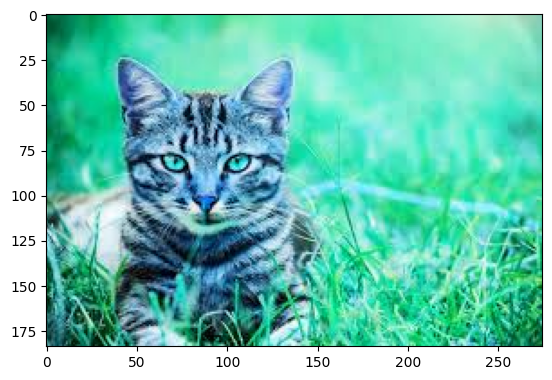

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(184, 275, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

# **Prediction**

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)

# 0 is for Cat
# 1 is for Dog